<div class="jumbotron">
  <h1 class="display-3">First (basic) lesson with Abinit and AbiPy</h1>
  <p class="lead">The H<sub>2</sub> molecule</p> 
  <hr class="my-4">
  <p>This lesson aims at showing how to get the following physical properties:
      
      the (pseudo) total energy
      the bond length
      the charge density
      the atomisation energy
   
  </p>
  <p>You will learn about the two input files, the basic input variables, the existence of defaults, the actions of the parser, and the use of the multi-dataset feature. You will also learn about the two output files as well as the density file. This first lesson covers the sections 1, 3, 4 and 6 of the abinit help file.</p>
<p>
The very first step is a detailed tour of the input and output files: you are like a tourist, and you discover a town in a coach. You will have a bit more freedom after that first step. It is supposed that you have some good knowledge of UNIX/Linux.</p>
</p>
  <p class="lead">
    <a class="btn btn-primary btn-lg" href="#" role="button">Learn more</a>
  </p>
</div>

There are three methodologies to compute the optimal distance between the two Hydrogen atoms. One could:

   * compute the **total energy** for different values of the interatomic distance, make a fit through 
      the different points, and determine the minimum of the fitting function;
   * compute the **forces** for different values of the interatomic distance, make a fit through 
      the different values, and determine the zero of the fitting function;
   * use an automatic algorithm for minimizing the energy (or finding the zero of forces)

We will begin with the computation of energy and forces for different values of the interatomic distance. 
This exercise will allow us to learn how to use generate multiple input files with AbiPy and analyze multiple runs 
with the AbiPy robots.


The interatomic distance in the tbase1_1.in file was 1.4 Bohr. Suppose you decide to examine the interatomic distances from 1.0 Bohr to 2.0 Bohr, by steps of 0.05 Bohr. That is, 21 calculations.
If you are a UNIX guru, it will be easy for you to write a script that will drive these 21 calculations, changing automatically the variable xcart in the input file, and then gather all the data, in a convenient form to be plotted.
Well, are you a UNIX guru? If not, there is an easier path, all within ABINIT!

This is the multi-dataset mode. Detailed explanations about it can be found in sections 3.3, 3.4, 3.5 and 3.6, of the abinit help file.

Now, can you write an input file that will do the computation described above (interatomic distances from 1.0 Bohr to 2.0 Bohr, by steps of 0.05 Bohr)? You might start from tbase1_1.in. Try to define a series, and to use the getwfk input variable (the latter will make the computation much faster).

You should likely have a look at the section that describes the irdwfk and getwfk input variables: in particular, look at the meaning of getwfk -1

Also, define explicitly the number of states (or supercell “bands”) to be one, using the input variable nband.

## Our first python function

In [1]:
# Use this at the beginning of your script so that your code will be compatible with python3
from __future__ import print_function, division, unicode_literals

import numpy as np
import seaborn

from abipy import abilab

# This line tells the notebook to show plots inside of the notebook
%matplotlib notebook

Now we need a function that generates an input file for a GS calculation of H2 in a big box.
Ideally we would like a function that receives some arguments so that we can customize the input variables
and generate multiple calculations easily.

Fortunately we already have such a function in the `mkflow.py` module.
Let's import it and look at the code.

In [2]:
from mkflow import gs_input
abilab.print_source(gs_input)

If the function is called without arguments, default values are used. Let's try:

In [3]:
inp = gs_input()
print("ecut", inp["ecut"])

ecut 10


`inp` is a dict-like object but since we are working inside a notebook we can look at its HTML representation:

In [4]:
inp

<AbinitInput at 4722696824>

The input can be coverted into an Abinit input string but, more importantly, an input *has* an AbiPy structure (actually a sub-clall of pymatgen structure), a list of pseudopotential objects and provides several methods
that are quite handy for the generation of our inputs.

In [5]:
print(inp.structure)
print("The big box volume is:", inp.structure.volume)

Full Formula (H2)
Reduced Formula: H2
abc   :   5.291772   5.291772   5.291772
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP        a    b    c
---  ----  -----  ---  ---
  0  H     -0.07    0    0
  1  H      0.07    0    0
The big box volume is: 148.184711276


Let's get some info about the pseudopotential used in our calculation:

In [6]:
print(inp.pseudos[0])

<NcAbinitPseudo: 01h.pspgth>
  summary: Goedecker-Teter-Hutter  Wed May  8 14:27:44 EDT 1996
  number of valence electrons: 1.0
  maximum angular momentum: s
  angular momentum for local part: s
  XC correlation: LDA_XC_TETER93
  supports spin-orbit: False
  radius for non-linear core correction: 0.0
  hint for low accuracy: ecut: 0.0, pawecutdg: 0.0
  hint for normal accuracy: ecut: 0.0, pawecutdg: 0.0
  hint for high accuracy: ecut: 0.0, pawecutdg: 0.0


<div class="alert alert-danger">
Blah blah blah
</div>

## Computation of the interatomic distance (method 1)

In [7]:
from mkflow import build_flow
abilab.print_source(build_flow)

In [8]:
abo = abilab.abiopen("flow_h2/w0/t0/run.abo")
print(abo)

ndtset: 1, completed: True
Full Formula (H2)
Reduced Formula: H2
abc   :   5.291772   5.291772   5.291772
angles:  90.000000  90.000000  90.000000

Spglib space group info (magnetic symmetries are not taken into account).
Spacegroup: P4/mmm (123), Hall: -P 4 2, Abinit spg_number: 123
Crystal_system: tetragonal, Lattice_type: tetragonal, Point_group: 4/mmm

  Idx  Symbol    Reduced_Coords              Wyck      EqIdx
-----  --------  --------------------------  ------  -------
    0  H         -0.05000 +0.00000 +0.00000  g             0
    1  H         +0.05000 +0.00000 +0.00000  g             0

Abinit Spacegroup: spgid: 123, num_spatial_symmetries: 16, has_timerev: True, symmorphic: False


In [9]:
print(abo.events)

Events found in /Users/gmatteo/git_repos/abitutorials/abitutorials/base1/flow_h2/w0/t0/run.abo

num_errors: 0, num_warnings: 0, num_comments: 0, completed: False



<IPython.core.display.Javascript object>


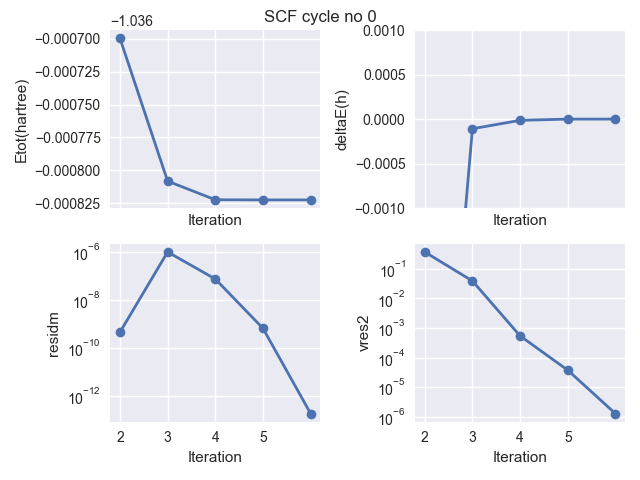

exception while parsing file /Users/gmatteo/git_repos/abitutorials/abitutorials/base1/flow_h2/w0/t0/run.abo:
/Users/gmatteo/git_repos/abitutorials/abitutorials/base1/flow_h2/w0/t0/run.abo: No timer section found


In [10]:
abo.plot()

In [11]:
with abilab.abiopen("flow_h2/w0/t0/outdata/out_GSR.nc") as gsr:
    print(gsr)

================================= File Info =================================
Name: out_GSR.nc
Directory: /Users/gmatteo/git_repos/abitutorials/abitutorials/base1/flow_h2/w0/t0/outdata
Size: 8.20 kb
Access Time: Tue Oct 10 22:13:40 2017
Modification Time: Tue Oct 10 21:27:35 2017
Change Time: Tue Oct 10 21:27:35 2017

================================= Structure =================================
Full Formula (H2)
Reduced Formula: H2
abc   :   5.291772   5.291772   5.291772
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP        a    b    c  cartesian_forces
---  ----  -----  ---  ---  --------------------------------------------------
  0  H     -0.05    0    0  [-19.54779666  -0.          -0.        ] eV ang^-1
  1  H      0.05    0    0  [ 19.54779666  -0.          -0.        ] eV ang^-1

Stress tensor (Cartesian coordinates in Ha/Bohr**3):
[[ -3.65644463e-04   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   5.46899250e-05   0.00000000e+00]
 [  0.00000000e+00   0.00000

Ok now we know how to open and extract information from one GSR file but in this particular
case we need to analyze multiple GSR file.

If you are familiar with python, it should not be so difficult to write a `for loop` that 
iterates over a list of GSR files, extracts the total energy and the volume and creates two
lists than can used to plot $E(V)$.
This kind of operations are however very common and AbiPy provides a high-level interface to
operate on multiple files and post-process the data.

In the simplest case, the `Robot` finds all files of a particula type located within a directory tree,
stores all the data in memory and exposes methods to extract/post-process the results.

In [23]:
with abilab.GsrRobot.from_dir("flow_h2") as robot:
    table = robot.get_dataframe()
table

,energy,pressure,max_force,ecut,pawecutdg,tsmear,nkpt,nsppol,nspinor,nspden,...,angle0,angle1,angle2,a,b,c,volume,abispg_num,spglib_symb,spglib_num
flow_h2/w0/t0/outdata/out_GSR.nc,-28.213374,2.513190,19.547797,10.0,-1.0,0.01,1,1,1,1,...,90.0,90.0,90.0,5.291772,5.291772,5.291772,148.184711,123,P4/mmm,123
flow_h2/w0/t1/outdata/out_GSR.nc,-28.697681,1.960241,15.457585,10.0,-1.0,0.01,1,1,1,1,...,90.0,90.0,90.0,5.291772,5.291772,5.291772,148.184711,123,P4/mmm,123
flow_h2/w0/t10/outdata/out_GSR.nc,-30.091282,-1.106893,0.050198,10.0,-1.0,0.01,1,1,1,1,...,90.0,90.0,90.0,5.291772,5.291772,5.291772,148.184711,123,P4/mmm,123
flow_h2/w0/t11/outdata/out_GSR.nc,-30.081045,-1.306065,0.669857,10.0,-1.0,0.01,1,1,1,1,...,90.0,90.0,90.0,5.291772,5.291772,5.291772,148.184711,123,P4/mmm,123
flow_h2/w0/t12/outdata/out_GSR.nc,-30.054897,-1.486644,1.198657,10.0,-1.0,0.01,1,1,1,1,...,90.0,90.0,90.0,5.291772,5.291772,5.291772,148.184711,123,P4/mmm,123
flow_h2/w0/t13/outdata/out_GSR.nc,-30.015128,-1.650522,1.652942,10.0,-1.0,0.01,1,1,1,1,...,90.0,90.0,90.0,5.291772,5.291772,5.291772,148.184711,123,P4/mmm,123
flow_h2/w0/t14/outdata/out_GSR.nc,-29.963621,-1.799430,2.045489,10.0,-1.0,0.01,1,1,1,1,...,90.0,90.0,90.0,5.291772,5.291772,5.291772,148.184711,123,P4/mmm,123
flow_h2/w0/t15/outdata/out_GSR.nc,-29.901949,-1.934775,2.386232,10.0,-1.0,0.01,1,1,1,1,...,90.0,90.0,90.0,5.291772,5.291772,5.291772,148.184711,123,P4/mmm,123
flow_h2/w0/t16/outdata/out_GSR.nc,-29.831440,-2.058170,2.682742,10.0,-1.0,0.01,1,1,1,1,...,90.0,90.0,90.0,5.291772,5.291772,5.291772,148.184711,123,P4/mmm,123
flow_h2/w0/t17/outdata/out_GSR.nc,-29.753241,-2.170736,2.940714,10.0,-1.0,0.01,1,1,1,1,...,90.0,90.0,90.0,5.291772,5.291772,5.291772,148.184711,123,P4/mmm,123


Great, we managed to get a nice table with lot of useful results with just 3 lines of code!
There are however two problems:
    
   - The rows of the table are not ordered by volume (files are sorted alphabetically)
   - Our dataframe contains the energy of the different configurations but we would like to plot energy vs H-H distance
   
Well, robots can do a lot of hard work but they are a little bit stupid so we have to tell them what to do with the data. More specifically we need a way to tell the robot that for each GSR file, it should get the crystalline 
structure, compute the distance between the first and the second atom and insert the result in our table 
in a given column. 

This kind of tasks are usually executed with `callbacks` i.e. functions that are passed as argument and executed
by the framework at runtime.

In [33]:
help(robot.get_dataframe)

Help on method get_dataframe in module abipy.abio.robots:

get_dataframe(with_geo=True, abspath=False, **kwargs) method of abipy.abio.robots.GsrRobot instance
    Return a pandas DataFrame with the most important GS results.
    and the filenames as index.
    
    Args:
        with_geo: True if structure info should be added to the dataframe
        abspath: True if paths in index should be absolute. Default: Relative to getcwd().
    
    kwargs:
        attrs:
            List of additional attributes of the :class:`GsrFile` to add to
            the pandas :class:`DataFrame`
        funcs:
            Function or list of functions to execute to add more data to the DataFrame.
            Each function receives a :class:`GsrFile` object and returns a tuple (key, value)
            where key is a string with the name of column and value is the value to be inserted.



It seems a little bit complicated but the actual implementation has more documentation that lines of code:

In [26]:
def hh_dist(gsr):
    """
    This callback receives a GSR file and computes the H-H distance.
    The robot will call this function to compute the H-H distance, 
    and return a (key, value) tuple that will be inserted in the pandas DataFrame.
    """
    cart_coords = gsr.structure.cart_coords
    l = np.linalg.norm(cart_coords[1] - cart_coords[0])
    return "hh_dist", l

with abilab.GsrRobot.from_dir("flow_h2") as robot:
    table = robot.get_dataframe(funcs=hh_dist)
    table = table.sort_values(by="hh_dist")  

In [27]:
table.keys()

Index(['energy', 'pressure', 'max_force', 'ecut', 'pawecutdg', 'tsmear',
       'nkpt', 'nsppol', 'nspinor', 'nspden', 'formula', 'natom', 'angle0',
       'angle1', 'angle2', 'a', 'b', 'c', 'volume', 'abispg_num',
       'spglib_symb', 'spglib_num', 'hh_dist'],
      dtype='object')

In [28]:
table[["hh_dist", "energy", "volume"]]

,hh_dist,energy,volume
flow_h2/w0/t0/outdata/out_GSR.nc,0.529177,-28.213374,148.184711
flow_h2/w0/t1/outdata/out_GSR.nc,0.556959,-28.697681,148.184711
flow_h2/w0/t2/outdata/out_GSR.nc,0.584741,-29.079272,148.184711
flow_h2/w0/t3/outdata/out_GSR.nc,0.612523,-29.377087,148.184711
flow_h2/w0/t4/outdata/out_GSR.nc,0.640304,-29.606392,148.184711
flow_h2/w0/t5/outdata/out_GSR.nc,0.668086,-29.779514,148.184711
flow_h2/w0/t6/outdata/out_GSR.nc,0.695868,-29.906409,148.184711
flow_h2/w0/t7/outdata/out_GSR.nc,0.723650,-29.995127,148.184711
flow_h2/w0/t8/outdata/out_GSR.nc,0.751432,-30.052173,148.184711
flow_h2/w0/t9/outdata/out_GSR.nc,0.779213,-30.082807,148.184711


The energy in our DataFrame is given in eV to faciliate the integration with other pymatgen tools in which
energies are in eV and lenghts are in Angstrom.

Let's add another column to our table with energies in Hartree:

In [29]:
table["energy_Ha"] = table["energy"] * abilab.units.eV_to_Ha

and use the pandas DataFrame `plot` method to plot `energy_Ha` vs `hh_dist`  

<IPython.core.display.Javascript object>


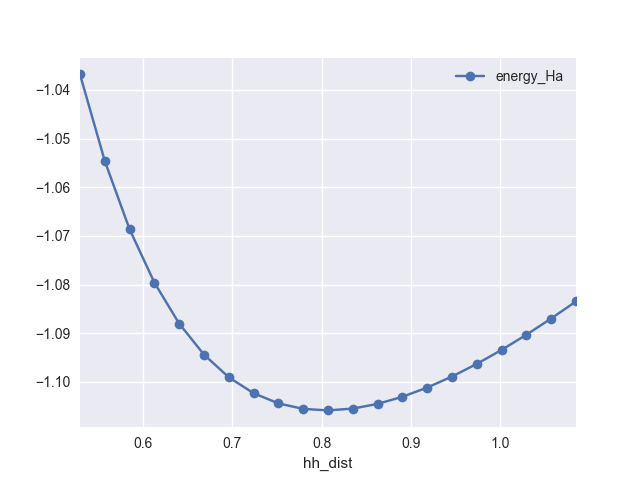

In [34]:
table.plot(x="hh_dist", y="energy_Ha", style="-o");

At this point, it should be clear that to plot the maximum of the forces as a function of the H-H distance
we just need:

<IPython.core.display.Javascript object>


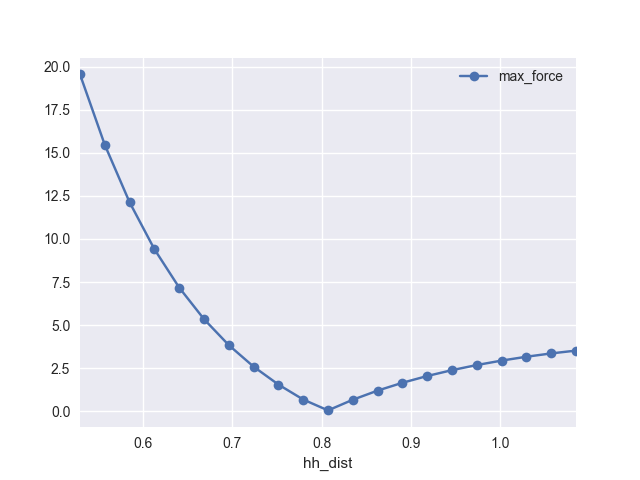

In [35]:
table.plot(x="hh_dist", y="max_force", style="-o");

## Analysis of the charge density

In [17]:
with abilab.abiopen("flow_h2/w0/t10/outdata/out_DEN.nc") as denfile:
    print(denfile)
    density = denfile.density

================================= File Info =================================
Name: out_DEN.nc
Directory: /Users/gmatteo/git_repos/abitutorials/abitutorials/base1/flow_h2/w0/t10/outdata
Size: 217.43 kb
Access Time: Tue Oct 10 22:13:42 2017
Modification Time: Tue Oct 10 21:27:37 2017
Change Time: Tue Oct 10 21:27:37 2017

================================= Structure =================================
Full Formula (H2)
Reduced Formula: H2
abc   :   5.291772   5.291772   5.291772
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP           a    b    c
---  ----  --------  ---  ---
  0  H     -0.07625    0    0
  1  H      0.07625    0    0

============================== Electronic Bands ==============================
Number of electrons: 2.0, Fermi level: -9.658 [eV]
nsppol: 1, nkpt: 1, mband: 1, nspinor: 1, nspden: 1
smearing scheme: none, tsmear_eV: 0.272, occopt: 1
Bandwidth: 0.000 [eV]
Valence minimum located at:
    spin=0, kpt=[+0.000, +0.000, +0.000], weight: 1.000, band=0, 

<IPython.core.display.Javascript object>


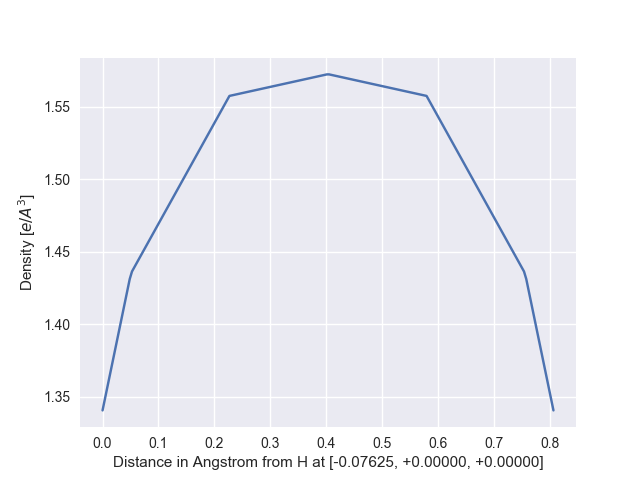

In [18]:
fig = density.plot_line(0, 1)

## Conclusions

To summarize, we learned how to define python functions that can used to generate many input files easily.
We briefly discussed how to use these inputs to build a simple AbiPy flows without dependencies.
More importantly, we showed that AbiPy provides several tools that can be used to inspect/analyze 
the results of Abinit calculations without having to pass necessarly through the creation and execution of the flow.

Indeed, AbiPy users are strongly recommended to familiarize themself with this kind of interface before
moving to more advances features that requires a good understanding of the python language.
Last but not least, we discussed how to use robots to collect results from the output files and store them in pandas DataFrames. 

As a matter of fact, we decided to write AbiPy in python not because of its efficiency (actually it's usually slower that Fortran/C) but because there are tons of libraries for scientific applications (numpy, scipy, pandas, matplotlib, jupyter, etc) and if you learn to use these tools you can really save a lot of time.

## Exercises

In [19]:
!abiopen.py --help

usage: abiopen.py [-h] [--loglevel LOGLEVEL] [-V] [-v] [-nb] [--foreground]
                  [-p]
                  filepath

positional arguments:
  filepath             File to open. See table below for the list of supported
                       extensions.

optional arguments:
  -h, --help           show this help message and exit
  --loglevel LOGLEVEL  Set the loglevel. Possible values: CRITICAL, ERROR
                       (default), WARNING, INFO, DEBUG
  -V, --version        show program's version number and exit
  -v, --verbose        verbose, can be supplied multiple times to increase
                       verbosity
  -nb, --notebook      Open file in jupyter notebook
  --foreground         Run jupyter notebook in the foreground.
  -p, --print          Print python object and return.

Usage example:

    abiopen.py FILE        => Open file in ipython shell.
    abiopen.py FILE -nb       => Generate jupyter notebook.
    abiopen.py FILE -p    => Print info on object to ter